In [1]:
# Unita: GDT

## Semplice classificazione basata su Logistic Regression e Tensorflow.

In [2]:
# in seguito ci servono
from __future__ import print_function
import numpy as np
import tensorflow as tf
from six.moves import cPickle as pickle
from six.moves import range


In [14]:
# partiamo dall'output dell'unità 04
# folder dove e' posizionato il file pickle
pickle_file = "../datasets/notMNIST.pickle"

In [15]:
# carico i dati
with open(pickle_file, 'rb') as f:
  saved = pickle.load(f)
  train_dataset = saved['train_dataset']
  train_labels = saved['train_labels']
  valid_dataset = saved['valid_dataset']
  valid_labels = saved['valid_labels']
  test_dataset = saved['test_dataset']
  test_labels = saved['test_labels']
  del saved  # garbage collector per liberare memoria
  print('Training set', train_dataset.shape, train_labels.shape)
  print('Validation set', valid_dataset.shape, valid_labels.shape)
  print('Test set', test_dataset.shape, test_labels.shape)

Training set (200000, 28, 28) (200000,)
Validation set (10000, 28, 28) (10000,)
Test set (10000, 28, 28) (10000,)


In [5]:
print(train_dataset[0])
print(train_labels[0].shape)

[[-0.14313726  0.37450981  0.22941177  0.20196079  0.18235295  0.15490197
   0.13137256  0.10392157  0.07647059  0.0372549  -0.00196078 -0.03333334
  -0.06470589 -0.08431373 -0.10392157 -0.10392157 -0.08039216 -0.05686275
  -0.03333334  0.00588235  0.08039216  0.13921569  0.18235295  0.23333333
  -0.10784314 -0.48039216 -0.5        -0.5       ]
 [-0.19803922  0.5        -0.04117647 -0.34705883 -0.27254903 -0.24509804
  -0.21372549 -0.18235295 -0.15490197 -0.11568628 -0.07647059 -0.04509804
  -0.02156863 -0.00588235  0.00196078  0.00980392 -0.00196078 -0.00980392
  -0.0254902  -0.06470589 -0.12745099 -0.19019608  0.35490197  0.5         0.5
   0.3392157  -0.04509804 -0.43333334]
 [-0.28431374  0.5        -0.0254902  -0.5        -0.49215686 -0.5        -0.5
  -0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
  -0.5        -0.5        -0.5        -0.5        -0.5        -0.49607843
  -0.5        -0.44509804  0.32745099  0.5         0.48823529  0.48431373
   0.5 

In [16]:
# Riportiamo i dati nel formato adatto al processamento: matrix 1-dim + vettore 1-hot encoding
image_size = 28
num_labels = 10

def reformat(dataset, labels):
  # -1 indica che la dimensione iniziale rimane invariata
  dataset = dataset.reshape((-1, image_size * image_size)).astype(np.float32)
  # Map 0 to [1.0, 0.0, 0.0 ...], 1 to [0.0, 1.0, 0.0 ...]
  # aggiungo una dimensione a labels
  labels = (np.arange(num_labels) == labels[:,None]).astype(np.float32)
  return dataset, labels

train_dataset, train_labels = reformat(train_dataset, train_labels)
valid_dataset, valid_labels = reformat(valid_dataset, valid_labels)
test_dataset, test_labels = reformat(test_dataset, test_labels)
print('Training set', train_dataset.shape, train_labels.shape)
print('Validation set', valid_dataset.shape, valid_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)


Training set (200000, 784) (200000, 10)
Validation set (10000, 784) (10000, 10)
Test set (10000, 784) (10000, 10)


In [7]:
print(train_dataset[0])
print(train_labels[0].shape)

[-0.14313726  0.37450981  0.22941177  0.20196079  0.18235295  0.15490197
  0.13137256  0.10392157  0.07647059  0.0372549  -0.00196078 -0.03333334
 -0.06470589 -0.08431373 -0.10392157 -0.10392157 -0.08039216 -0.05686275
 -0.03333334  0.00588235  0.08039216  0.13921569  0.18235295  0.23333333
 -0.10784314 -0.48039216 -0.5        -0.5        -0.19803922  0.5
 -0.04117647 -0.34705883 -0.27254903 -0.24509804 -0.21372549 -0.18235295
 -0.15490197 -0.11568628 -0.07647059 -0.04509804 -0.02156863 -0.00588235
  0.00196078  0.00980392 -0.00196078 -0.00980392 -0.0254902  -0.06470589
 -0.12745099 -0.19019608  0.35490197  0.5         0.5         0.3392157
 -0.04509804 -0.43333334 -0.28431374  0.5        -0.0254902  -0.5
 -0.49215686 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.49607843 -0.5        -0.44509804  0.32745099  0.5
  0.48823529  0.48431373  0.5        -0.20980392 -0.3509804   0

In [ ]:
## PROBLEMA #1
# Implementare una logistic regression multinomiale con discesa del gradiente 
# con Tensorflow (TF) come classificatore per notMNIST.

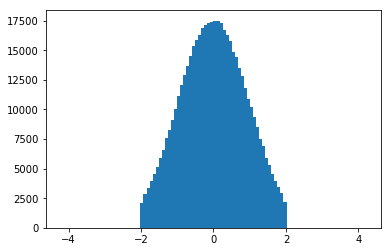

In [5]:
# La matrice dei pensi W viene spesso inizializzata con una variabile casuale con distribuzione normale,
# dove i valori maggiori di 2 x std_dev sono rimossi.
# weights = tf.Variable( tf.truncated_normal(...))

# Questo permette di ignorare valori troppo grandi o piccoli che possono influenzare negativamente l'apprendimento.
import matplotlib.pyplot as plt

%matplotlib inline  

n = 500000
A = tf.truncated_normal((n,))
B = tf.random_normal((n,))
with tf.Session() as sess:
    a, b = sess.run([A, B])

plt.hist(a, 100, (-4.2, 4.2));

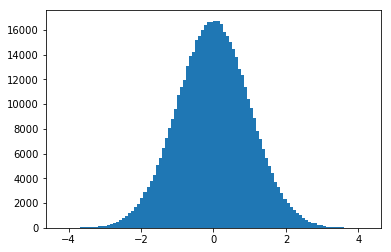

In [4]:
plt.hist(b, 100, (-4.2, 4.2));

In [8]:
# Prendiamo un subset per limitare il tempo per l'addetramento, diminuiscilo se occorre
train_subset = 10000

# Su Tensorflow ogni elemento - input, variabili ed elaborazioni - è descritto mediante un grafo, o dataflow graph.
# Gli oggetti tf.Operation rappresentano unità di computazione;
# Gli oggetti tf.Tensor rappresentano unità di dati (tensori) che sono usati come input e output per gli oggetti Operation.

# In TF un grafo tf.Graph contiene due tipi di informazione:
# La struttura: nodi e archi che rappresentano le operazioni 
# Le collections: insiemi di metadati (inseriti con tf.add_to_collection) nella forma <chiave,lista di objects); si può ispezionare con tf.get_collection.

# TF usa questa struttura per salvare variabili e altre informazioni del grafo.

# Un oggetto Graph di default è sempre prensente e accedibile chiamando tf.get_default_graph. 

# Un approccio alternativo per usare i grafo di Tensorflow consiste nel context manager tf.Graph.as_default, 
# che sostituisce il grafo di default per tutta l'esistenza del contesto in esame.
graph = tf.Graph()

# Costruisco un grafo di computazione con Tensorflow
with graph.as_default():

  # Creo tensori costanti per i seguenti set: trainig, test e validation
  tf_train_dataset = tf.constant(train_dataset[:train_subset, :])
  # per assegnare un nome alla variabile possiamo usare il secondo parametro, e.g., tf.constant(0, name="c") 
  tf_train_labels = tf.constant(train_labels[:train_subset])
  tf_valid_dataset = tf.constant(valid_dataset)
  tf_test_dataset = tf.constant(test_dataset)
  
  # Le variabili mantengono lo stato durante le elaborazioni. Sono anch'esse tensori.
  weights = tf.Variable(
    tf.truncated_normal([image_size * image_size, num_labels]))
  # Il vettore di bias b è inizializzato a 0.
  biases = tf.Variable(tf.zeros([num_labels]))
  
  # Calcolo Wx + b
  logits = tf.matmul(tf_train_dataset, weights) + biases

  # La funzione softmax_cross_entropy_with_logits valuta la funzione di loss
  # per mezzo della cross-entropy loss con l'output corretto (tf_train_labels)
  # Mentre reduce_mean valuta semplicemente la media dei valori del tensore.
  # loss indica una operazione TF.
  loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=tf_train_labels, logits=logits))
  
  # Instanzio un algoritmo di discesa del gradiente con learning rate = 0.5 (alfa nelle slide di richiami sulle reti neurali.)
  # La funzione minimize è composta di 2 elaborazioni: compute_gradients e apply_gradients.
  # La prima ricava i gradienti, la seconda aggiorna la matrice dei pesi di conseguenza.
  # optimizer indica una operazione TF.
  optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
    
  # calcolo softmax = tf.exp(logits) / tf.reduce_sum(tf.exp(logits), dim) per i sets: 
  # training, validation e test.
  # N.B.: i set valid e test sono usati solo per la valutazione, non c'è backprop
  # N.B.(2): ci servono per valutare l'accuratezza, l'apprendimento l'abbiamo già fatto.
  train_prediction = tf.nn.softmax(logits)
  logits = tf.matmul(tf_valid_dataset, weights) + biases
  valid_prediction = tf.nn.softmax(logits) 
  logits = tf.matmul(tf.matmul(tf_test_dataset, weights) + biases
  test_prediction = tf.nn.softmax(logits)

In [9]:
# numero cicli di elaborazione
num_steps = 801

# Definisco l'accuratezza come somma del numero di predizioni corrette 
# normalizzato sul numero di predizioni totali.
# La uso per fare statistiche durante il funzionamento.
def accuracy(predictions, labels):
  return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])

# TF usa tf.Session per rappresentare una connesione tra il programa e il runtime C++.
# Serve per creare un ambiente in cui lanciare le operazioni definite nel grafo.
# Poichè la classe alloca risorse fisiche, solitamente si usa come context manager (dentro un blocco with),
# che le libera automaticamente al termine del blocco, cioè lancia session.close() al termine della esecuzione.
with tf.Session(graph=graph) as session:
  # Istanzia e lancia una operazione per l'inizializzazione delle variabili globali del grafo
  # cioè: weights e biases. Va eseguita solo una volta.
  tf.global_variables_initializer().run()
  print('Initialized')
      
  for step in range(num_steps):
    # Eseguo le operazioni nel grafo.
    # Le operazioni e i tensori da valutare sono definiti nel primo parametro, un NumPy array.
    # La lista indica le foglie grafo.
    # Il valore di ritorno ha lo stesso tipo dell'input, cioè un array, 
    # dove le foglie sono sostituite con il corrispondente valore calcolato da TF.
    _, l, predictions = session.run([optimizer, loss, train_prediction])
    # ogni tanto stampo statistiche
    if (step % 100 == 0):
      print('Loss at step %d: %f' % (step, l))
      print('Training accuracy: %.1f%%' % accuracy(
        predictions, train_labels[:train_subset, :]))
      # Se invoco eval() su valid_prediction, sto calcolando l'operazione sui 
      # pesi e bias correnti.
      print('Validation accuracy: %.1f%%' % accuracy(
        valid_prediction.eval(), valid_labels))
  # Al termine stamo l'accuracy sul test set.
  print('Test accuracy: %.1f%%' % accuracy(test_prediction.eval(), test_labels))

Initialized
Loss at step 0: 16.911768
Training accuracy: 8.6%
Validation accuracy: 11.8%
Loss at step 100: 2.283592
Training accuracy: 72.0%
Validation accuracy: 72.3%
Loss at step 200: 1.839189
Training accuracy: 74.8%
Validation accuracy: 74.7%
Loss at step 300: 1.599836
Training accuracy: 76.3%
Validation accuracy: 75.3%
Loss at step 400: 1.439709
Training accuracy: 77.0%
Validation accuracy: 75.6%
Loss at step 500: 1.321766
Training accuracy: 77.8%
Validation accuracy: 76.0%
Loss at step 600: 1.229986
Training accuracy: 78.3%
Validation accuracy: 76.1%
Loss at step 700: 1.155922
Training accuracy: 78.8%
Validation accuracy: 76.2%
Loss at step 800: 1.094414
Training accuracy: 79.1%
Validation accuracy: 76.3%
Test accuracy: 82.9%


In [10]:
## PROBLEMA #2
# Prova a modificare il codice precedente impiegando un Stochastic gradient descent.
# Quanto tempo impiega ora per terminare l'elaborazione?

In [41]:
# Durante l'elaborazone batch l'algoritmo elabora solo un sottoinsieme di dati alla volta.
# L'elaborazione è ripetuta, perciò conviene scrivere il codice 
# senza gestire la creazione dei dati direttamente.
# In TF un placeholder è una variabile che assumera i valori a tempo di esecuzione.
# Possiamo costruire il grafo delle operazioni senza il bisogno di conoscere i dati.

# Nel seguente codice creiamo una operazione (y) di moltiplicazione * 2 senza sapere i valori.
# Ora la possiamo eseguire all'interno di una sessione. Per valutarla occorre fornire (feed)
# i valori per x. 
# None significa che non poniamo vincoli sulla dimensione.
x = tf.placeholder(tf.float32, shape=None)
y = x * 2

# TF supporta tipi di variabili simili a NumPy (es. float32, float64, int32, int64)
# https://docs.scipy.org/doc/numpy-1.13.0/user/basics.types.html

with tf.Session() as session:
    result = session.run(y, feed_dict={x: [1, 2, 3]})
    print(result)

[ 2.  4.  6.]


In [ ]:
# N.B. Fuori dallo scope session non possiamo stampare il valore dei tensori 
# durante l'elaborazione.

# x = tf.placeholder("float", None)
# y = x * 2
# print(x) 

# Output: "Tensor("Placeholder_11:0", dtype=float32)" 
# Stampa solo il tipo e non il valore di x.
# In alternativa usare https://www.tensorflow.org/api_docs/python/tf/InteractiveSession

In [40]:
# Possiamo dare in input anche strutture più complesse indicando il formato dei dati con shape.
# Es. un qualsiasi numero di righe, ma il numero di colonne pari a 3
x = tf.placeholder(tf.float32, shape=[None, 3])
y = x * 2

with tf.Session() as session:
    x_data = [[1, 2, 3],
              [4, 5, 6],]
    result = session.run(y, feed_dict={x: x_data})
    print(result)

[[  2.   4.   6.]
 [  8.  10.  12.]]


In [ ]:
# Una immagine a colori (RGB) in formato raw può avere una rappresentazione matriciale
#image = tf.placeholder("uint8", shape=[None, None, 3])

In [11]:
batch_size = 128

graph = tf.Graph()
with graph.as_default():

  # Una operazione placeholder viene usata per alimentare il grafo.
  tf_train_dataset = tf.placeholder(tf.float32,
                                    shape=(batch_size, image_size * image_size))
  tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))

  # Il resto è uguale al precedente esempio.
  tf_valid_dataset = tf.constant(valid_dataset)
  tf_test_dataset = tf.constant(test_dataset)
  
  weights = tf.Variable(
    tf.truncated_normal([image_size * image_size, num_labels]))
  biases = tf.Variable(tf.zeros([num_labels]))
  
  logits = tf.matmul(tf_train_dataset, weights) + biases
  loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=tf_train_labels, logits=logits))
  
  optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
  
  train_prediction = tf.nn.softmax(logits)
  logits = tf.matmul(tf_valid_dataset, weights) + biases
  valid_prediction = tf.nn.softmax(logits) 
  logits = tf.matmul(tf.matmul(tf_test_dataset, weights) + biases
  test_prediction = tf.nn.softmax(logits)

In [12]:
# Se impiego minibatch potenzialmente ho più varianza nell'apprendimento ad ogni ciclo.
# Sono costretto ad aumentare gli step.
num_steps = 3001

with tf.Session(graph=graph) as session:
  tf.global_variables_initializer().run()
  print("Initialized")
    
  for step in range(num_steps):
    # Definisco un offset nel trainig set
    offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
    
    # Estraggo ilminibatch.
    batch_data = train_dataset[offset:(offset + batch_size), :]
    batch_labels = train_labels[offset:(offset + batch_size), :]

    # Dizionario {chiave_placeholder : valore, ...}
    feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
    
    _, l, predictions = session.run(
      [optimizer, loss, train_prediction], feed_dict=feed_dict)
    
    if (step % 500 == 0):
      print("Minibatch loss at step %d: %f" % (step, l))
      print("Minibatch accuracy: %.1f%%" % accuracy(predictions, batch_labels))
      print("Validation accuracy: %.1f%%" % accuracy(
        valid_prediction.eval(), valid_labels))
    
  print("Test accuracy: %.1f%%" % accuracy(test_prediction.eval(), test_labels))

Initialized
Minibatch loss at step 0: 14.712099
Minibatch accuracy: 10.9%
Validation accuracy: 15.6%
Minibatch loss at step 500: 1.678132
Minibatch accuracy: 76.6%
Validation accuracy: 76.3%
Minibatch loss at step 1000: 1.159136
Minibatch accuracy: 77.3%
Validation accuracy: 76.9%
Minibatch loss at step 1500: 1.157310
Minibatch accuracy: 77.3%
Validation accuracy: 78.4%
Minibatch loss at step 2000: 0.961426
Minibatch accuracy: 82.0%
Validation accuracy: 78.4%
Minibatch loss at step 2500: 1.139208
Minibatch accuracy: 75.0%
Validation accuracy: 79.4%
Minibatch loss at step 3000: 1.100741
Minibatch accuracy: 72.7%
Validation accuracy: 79.2%
Test accuracy: 85.8%


In [ ]:
## PROBLEMA #3
# Usando l'help online di TF prova a creare una rete neurale con 1-hidden layer
# con attivazione RELU e 1024 nodi nascosti.

# N.B. la funzione tf.nn.relu() restituisce un tensore che calcola la RELU sul tensore di input.
# L'output ha la stessa dimensione dell'input.

In [42]:
# nodi del hidden layer
hidden_nodes= 1024
batch_size = 128

graph = tf.Graph()
with graph.as_default():

    tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, image_size * image_size))
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
    tf_valid_dataset = tf.constant(valid_dataset)
    tf_test_dataset = tf.constant(test_dataset)

    # Avendo un layer in più ho due coppie <W,B>
    # N.B. W1 e B1 hanno dimensioni <#input-feature-vector,#hidden-nodes>, <#hidden-nodes>
    # mentre W2 <#hidden-nodes,num_labels>, <num_labels>
    weights_1 = tf.Variable(tf.truncated_normal([image_size * image_size, hidden_nodes]))
    biases_1 = tf.Variable(tf.zeros([hidden_nodes]))
    weights_2 = tf.Variable(tf.truncated_normal([hidden_nodes, num_labels]))
    biases_2 = tf.Variable(tf.zeros([num_labels]))

    
    logits_1 = tf.matmul(tf_train_dataset, weights_1) + biases_1
    relu_layer= tf.nn.relu(logits_1)
    logits_2 = tf.matmul(relu_layer, weights_2) + biases_2

    # Ora la loss function è definita sullo layer di output
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits \
                          (labels=tf_train_labels, logits=logits_2))

    optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
    
    train_prediction = tf.nn.softmax(logits_2)
    # Seguo la stessa pipeline per valid e test set
    logits_1 = tf.matmul(tf_valid_dataset, weights_1) + biases_1
    relu_layer= tf.nn.relu(logits_1)
    logits_2 = tf.matmul(relu_layer, weights_2) + biases_2
    valid_prediction = tf.nn.softmax(logits_2) 
    
    logits_1 = tf.matmul(tf_test_dataset, weights_1) + biases_1
    relu_layer= tf.nn.relu(logits_1)
    logits_2 = tf.matmul(relu_layer, weights_2) + biases_2
    test_prediction = tf.nn.softmax(logits_2)                     

In [25]:
num_steps = 3001

with tf.Session(graph=graph) as session:
  tf.global_variables_initializer().run()
  print("Initialized")
    
  for step in range(num_steps):
    offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
    
    batch_data = train_dataset[offset:(offset + batch_size), :]
    batch_labels = train_labels[offset:(offset + batch_size), :]
    
    feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
    
    _, l, predictions = session.run(
      [optimizer, loss, train_prediction], feed_dict=feed_dict)
    
    if (step % 500 == 0):
      print("Minibatch loss at step %d: %f" % (step, l))
      print("Minibatch accuracy: %.1f%%" % accuracy(predictions, batch_labels))
      print("Validation accuracy: %.1f%%" % accuracy(
        valid_prediction.eval(), valid_labels))
    
  print("Test accuracy: %.1f%%" % accuracy(test_prediction.eval(), test_labels))

Initialized
Minibatch loss at step 0: 380.785950
Minibatch accuracy: 7.0%
Validation accuracy: 27.6%
Minibatch loss at step 500: 14.854194
Minibatch accuracy: 85.9%
Validation accuracy: 81.8%
Minibatch loss at step 1000: 13.042046
Minibatch accuracy: 80.5%
Validation accuracy: 79.2%
Minibatch loss at step 1500: 8.946371
Minibatch accuracy: 79.7%
Validation accuracy: 80.5%
Minibatch loss at step 2000: 3.762165
Minibatch accuracy: 85.9%
Validation accuracy: 82.5%
Minibatch loss at step 2500: 3.894309
Minibatch accuracy: 82.8%
Validation accuracy: 82.8%
Minibatch loss at step 3000: 2.647440
Minibatch accuracy: 82.8%
Validation accuracy: 80.5%
Test accuracy: 86.8%
